In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

# Demo for Gaussian procesess realizations

In [7]:
import utility
# utility = reload(utility)

In [48]:
sample_size = 400
points = np.linspace(-0.1, 1, sample_size).reshape(-1, 1)
for first_L in [10, 100, 1000]:
    color_list = ['b', 'g', 'y']
    for index, color in enumerate(color_list):
        # first_theta = first_L / ((2 * np.pi) ** 0.5 * 4 * np.pi ** 2)
        first_theta = (first_L ** 0.5) / (3 ** 0.5)
        covariance_matrix = utility.get_covariance_matern_32(points, {'theta' : first_theta, 'noise_variance' : 1e-16})
        cholesky_covariance = np.linalg.cholesky(covariance_matrix)
        values = np.random.randn(sample_size, 1)
        values = np.dot(cholesky_covariance, values)
        if index == 0:
            plt.plot(points, values, 'b', label=r"$L = " + str(first_L) + "$", linewidth=2)
        else:
            plt.plot(points, values, color, linewidth=2)
    plt.xlabel(r"$x$", fontsize=30)
    if first_L == 10:
        plt.ylabel(r"$f(x)$", fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.grid(True)
    plt.axis([-0.05, 1, -3, 3])
    plt.savefig('realizations_matern_32_L_' + str(first_L) + '.png', 
                bbox_inches='tight', pad_inches=0, dpi=400)
    plt.close('all')

1.82574185835
1.82574185835
1.82574185835
5.7735026919
5.7735026919
5.7735026919
18.2574185835
18.2574185835
18.2574185835


In [7]:
sample_size = 400
points = np.linspace(-0.1, 1, sample_size).reshape(-1, 1)
for theta in [2, 6, 20]:
    color_list = ['b', 'g', 'y']
    for index, color in enumerate(color_list):
        covariance_matrix = utility.get_covariance_matern_32(points, {'theta' : theta, 'noise_variance' : 1e-16})
        cholesky_covariance = np.linalg.cholesky(covariance_matrix)
        values = np.random.randn(sample_size, 1)
        values = np.dot(cholesky_covariance, values)
        #if index == 0:
        #    plt.plot(points, values, 'b', label=r"$L = " + str(first_L) + "$", linewidth=2)
        #else:
        plt.plot(points, values, color, linewidth=2)
    plt.xlabel(r"$x$", fontsize=30)
    if theta == 2:
        plt.ylabel(r"$u(x)$", fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.grid(True)
    plt.axis([-0.05, 1, -3, 3])
    plt.savefig('realizations_matern_32_theta_' + str(theta) + '_u.png', 
                bbox_inches='tight', pad_inches=0, dpi=400)
    plt.close('all')

In [13]:
sample_size = 400
points = np.linspace(0, 1, sample_size).reshape(-1, 1)
for first_L in [500]:
  color_list = ['b', 'g', 'y']
  for index, color in enumerate(color_list):
      # first_theta = first_L / ((2 * np.pi) ** 0.5 * 4 * np.pi ** 2)
      first_theta = (first_L ** 0.5) / (3 ** 0.5)
      covariance_matrix = utility.get_covariance_matern_32(points, {'theta' : first_theta, 'noise_variance' : 1e-16})
      cholesky_covariance = np.linalg.cholesky(covariance_matrix)
      values = np.random.randn(sample_size, 1)
      values = np.dot(cholesky_covariance, values)
      if index == 0:
          plt.plot(points, values, 'b', label=r"$L = " + str(first_L) + "$", linewidth=2)
      else:
          plt.plot(points, values, color, linewidth=2)
  plt.xlabel(r"$x$", fontsize=25)
  plt.ylabel(r"$f(x)$", fontsize=25)
  plt.grid(True)
  plt.axis([0, 1, -3, 3])
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  
  plt.savefig('realizations_matern_12_L_' + str(first_L) + '.pdf', bbox_inches='tight')
  plt.close('all')

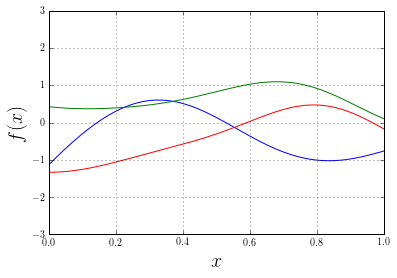

In [55]:
second_L = 10
for index in range(3):
    # second_theta = second_L / ((2 * np.pi) ** 0.5 * 4 * np.pi ** 2)
    second_theta = second_L / 2
    covariance_matrix = utility.get_covariance(points, {'theta' : second_theta, 'noise_variance' : 1e-16})
    cholesky_covariance = np.linalg.cholesky(covariance_matrix)
    values = np.random.randn(sample_size, 1)
    values = np.dot(cholesky_covariance, values)
    if index == 0:
        plt.plot(points, values, label=r"$L = " + str(second_L) + "$")
    else:
        plt.plot(points, values, )

plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$f(x)$", fontsize=20)
plt.grid(True)
plt.axis([0, 1, -3, 3])
plt.savefig('realizations_L_' + str(second_L) + '.png', dpi=300)

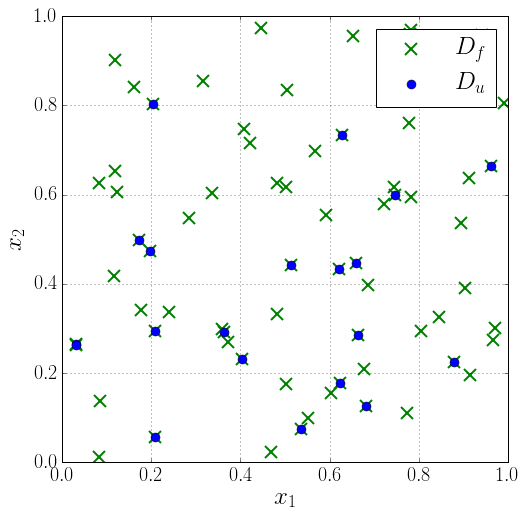

In [33]:
plt.figure(figsize=(8, 8))
high_fidelity_points = np.random.rand(20, 2)
low_fidelity_points = np.vstack((high_fidelity_points, 
                                 np.random.rand(50, 2)))
plt.plot(low_fidelity_points[:, 0], low_fidelity_points[:, 1], 'x', markersize=12, markeredgewidth=2, 
         markerfacecolor='none', markeredgecolor='g', label=r"$D_f$")
plt.plot(high_fidelity_points[:, 0], high_fidelity_points[:, 1], 'ob', markersize=9, markeredgecolor=None, label=r"$D_u$")

plt.grid(True)
plt.xlabel(r"$x_1$", fontsize=25)
plt.ylabel(r"$x_2$", fontsize=25)
plt.legend(numpoints=1, fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('nested_design.png', dpi=400)

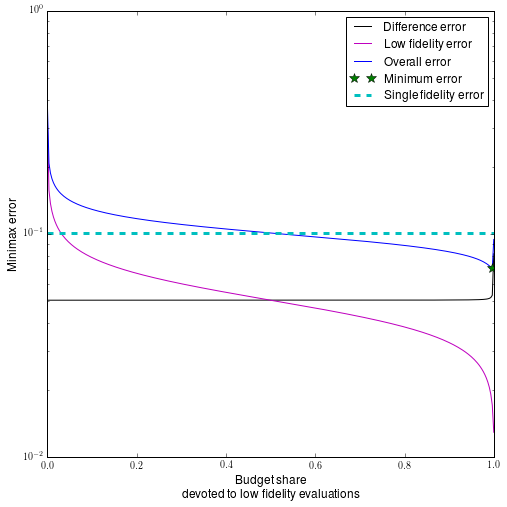

In [170]:
Lf = 1.
Lg = 1.
rho = 1.
cost_ratio = 1000.
input_dimension = 10
total_budget = 1000
lower_bound = 0.0001
upper_bound = 0.9999
lf_budget_share = np.linspace(lower_bound, upper_bound, 300)
hf_budget_share = 1 - lf_budget_share
lf_budget_ratio = lf_budget_share / hf_budget_share
hf_distance = ((cost_ratio + lf_budget_ratio) / total_budget) ** (1. / input_dimension)
lf_distance = ((cost_ratio + lf_budget_ratio) / lf_budget_ratio / total_budget) ** (1. / input_dimension)

difference_error = Lg / (2 * np.pi ** 2) * hf_distance ** 2
lf_error = rho ** 2 * Lf / (2 * np.pi ** 2) * lf_distance ** 2
minimax_error = (Lg / (2 * np.pi ** 2) * hf_distance ** 2 +
                 rho ** 2 * Lf / (2 * np.pi ** 2) * lf_distance ** 2)

optimal_ratio = (rho**2 * cost_ratio) ** (input_dimension / (input_dimension + 2.))
optimal_share = optimal_ratio / (optimal_ratio + 1)
hf_distance = ((cost_ratio + optimal_ratio) / total_budget) ** (1. / input_dimension)
lf_distance = ((cost_ratio + optimal_ratio) / optimal_ratio / total_budget) ** (1. / input_dimension)
optimal_minimax_error = (Lg / (2 * np.pi ** 2) * hf_distance ** 2 +
                 rho ** 2 * Lf / (2 * np.pi ** 2) * lf_distance ** 2)

hf_distance = (cost_ratio / total_budget) ** (1. / input_dimension)
high_fidelity_minimax_error = (Lg / (2 * np.pi ** 2) * hf_distance ** 2 +
                               rho ** 2 * Lf / (2 * np.pi ** 2) * hf_distance ** 2)

plt.figure(figsize=(8, 8))
plt.semilogy(lf_budget_share, difference_error, 'k', label='Difference error')
plt.semilogy(lf_budget_share, lf_error, 'm', label='Low fidelity error')
plt.semilogy(lf_budget_share, minimax_error, 'b', label='Overall error')
plt.semilogy(optimal_share, optimal_minimax_error, '*', color='g', 
         label='Minimum error', markersize=10)
plt.semilogy([lower_bound, upper_bound], 
         [high_fidelity_minimax_error, high_fidelity_minimax_error], 
         '--c', linewidth=3, label='Single fidelity error')
plt.legend()
plt.xlabel('Budget share \n devoted to low fidelity evaluations', fontsize=12)
plt.ylabel('Minimax error', fontsize=12)
# plt.axis([lower_bound, upper_bound, 
#           0.4 * np.min(minimax_error), 1.05 * np.max(minimax_error)])
# plt.axis([lower_bound, upper_bound, 
#           0, 1.05 * np.max(minimax_error)])

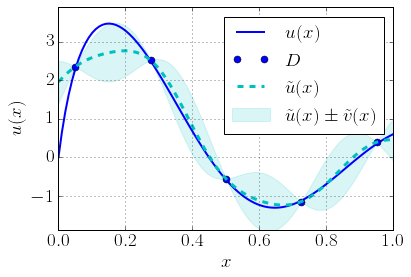

In [42]:
import GPy
import numpy as np

font_size = 19
sample_size = 5
training_points = np.linspace(0.05, 0.95, sample_size).reshape(-1, 1)
training_values = np.sin(7 * training_points) / (training_points + 0.1) + np.random.randn(sample_size, 1) * 0.03

kernel = GPy.kern.RBF(input_dim=1, variance=2., lengthscale=0.12)
model = GPy.models.GPRegression(training_points, training_values, kernel, noise_var=1e-7)

test_points = np.linspace(0, 1, 100).reshape(-1, 1)
test_values = np.sin(7 * test_points) / (test_points + 0.1)
# test_posterior = model.posterior_samples_f(test_points, full_cov=True, size=3)
test_values_sim, test_variance_sim = model.predict(test_points)

plt.plot(test_points, test_values, 'b', linewidth=2, label=r'$u(x)$')
# plt.plot(test_points, test_posterior)
plt.plot(training_points, training_values, 'ob', markersize=7, label=r'$D$')
plt.plot(test_points, test_values_sim, '--c',  linewidth=3, label=r'$\tilde{u}(x)$')
plt.fill_between(test_points.flatten(), (test_values_sim - test_variance_sim ** 0.5).flatten(), 
                 (test_values_sim + test_variance_sim ** 0.5).flatten(), alpha=0.15, label=r'$\tilde{u}(x)\pm\tilde{v}(x)$', color='c')
plt.xlabel(r'$x$', fontsize=font_size)
plt.ylabel(r'$u(x)$', fontsize=font_size)
plt.axis([0, 1, -1.9, 3.9])
plt.tick_params(axis='both', which='major', labelsize=font_size)
plt.grid(True)
plt.legend(fontsize=font_size)
plt.savefig('gp_example_u.png', bbox_inches='tight', pad_inches=0, dpi=300)